# Tp3 FMPS ##

In [1]:
import numpy as np
import pylab as pl
import scipy
import math
import scipy.signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
np.set_printoptions(precision=2,suppress=True) 

#  Ejercicio 1 Convolución Circular

Use una señal finita $N$ muestras se puede representar como un vector $x \in \mathbb{C}^n$,
$$
x=\left[\begin{matrix}x[0] \\ x[1] \\ \vdots \\ x[N-1] \end{matrix}\right]
$$
Usando la convolución circular, un operador linear y homogéneo en el tiempo se puede expresar como:
$$
y=x \circledast h = C_h^o x,
$$
donde $C_h^o \in \mathbb{M}_{\mathbb{C}}(N,N)$ es una matriz de convolución parametrizada por el vector $h$, la respuesta impulsional del filtro.

Debido a los efectos de los bordes, la convolución circular $\circledast$  es poco utilizada en algoritmos de la vida real. Se
ocupa en su reemplazo la convolución discreta donde las dos señales son “rellenadas” (padding en inglés) con
zeros fuera del intervalo de muestreo:
$$
\tilde{x}[n]=\left\{\begin{matrix}  x[n] & si & 0 \leq n <N, \\
                                0 & si no & \end{matrix}\right. , \tilde{x} \in \mathbb{C}^{2N-1}
$$
$$
\tilde{h}[n]=\left\{\begin{matrix}  h[n] & si & 0 \leq n <N, \\
                                0 & si no & \end{matrix}\right. , \tilde{h} \in \mathbb{C}^{2N-1}
$$
Escribamos luego 
$$
y=x\star h = C_h x
$$
donde $C_h \in \mathbb{M}(2N-1,N).$

 1.- Dada una respuesta impulsional $h$, escriba las matrices $C_h$ y $C_h^o$. Pruebe que $C_h$ es una matriz de Toeplitz y $C_h^o$ es una matriz circulante.
 
Respuesta: Si
$$
h=\left[\begin{matrix}h[0] \\ h[1] \\ \vdots \\ h[N-1] \end{matrix}\right]
$$
entonces,
$$
C_h=\left[ \begin{matrix} 
h[0] & 0 & \dots & 0 \\
h[1] & h[0] & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
h[N-1] & h[N-2] & \dots & h[0] \\
0 & 0 & \dots & h[N-1]
\end{matrix}\right]
$$
y
$$
C_h^o=\left[ \begin{matrix} 
h[0] & h[N-1] & \dots & h[1] \\
h[1] & h[0] & \dots & h[2] \\
\vdots & \vdots & \ddots & \vdots \\
h[N-1] & h[N-2] & \dots & h[0] 
\end{matrix}\right]
$$

# Ejercicio 2 - Transformada de Fourier Discreta y rápida .

2.1.1.- Calcule las funciones de base de Fourier $e_k$ para todos los índices $k$ para una señal de tamaño $N = 32$.
Trazar sus partes reales e imaginarias en una figura.

Text(0, 0.5, 'amplitud parte imaginaria')

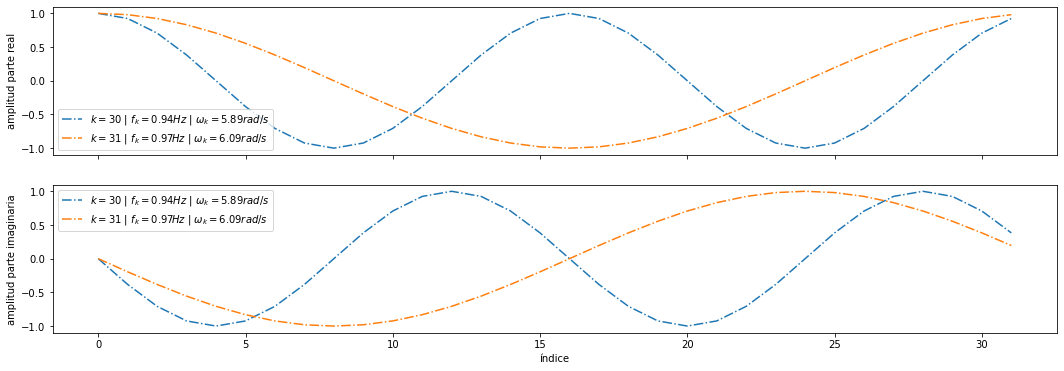

In [5]:
N=32
fig, axes= plt.subplots(2, 1, figsize=(18,6), sharex=True)
t = np.arange(0,N,1)
#Realiza los graficos para separar la amplitud
for k in range(N-2,N):
    fk=k/N
    wk=2*np.pi*fk
    ek=np.exp(1j*wk*t)
    o1=axes[0].plot(t,np.real(ek),'-.',label=f'$k={k}$ | $f_k={fk:.2f} Hz$ | $\omega_k={wk:.2f} rad/s$')
    o2=axes[1].plot(t,np.imag(ek),'-.',label=f'$k={k}$ | $f_k={fk:.2f} Hz$ | $\omega_k={wk:.2f} rad/s$')
axes[0].legend()
axes[0].set_ylabel('amplitud parte real')
axes[1].legend()
axes[1].set_xlabel('índice')
axes[1].set_ylabel('amplitud parte imaginaria')

2.1.2.- Calcule $F_N$ la matriz de transformada discreta de Fourier (DFT) para $N = 1, 2, 4$ y $32$. Para $N = 32$
visualíce las partes reales e imaginarias como una imagen. ¿Qué contienen las líneas de la matriz $F_N$ ?

In [6]:
def MDFT(N):
    FN=np.zeros(shape=(N,N),dtype=complex)
    omegaN=np.exp(1j*2*np.pi/N)
    for i in range(N):
        for j in range(N):
            FN[i,j]=omegaN**(i*j)
    return FN

In [7]:
MDFT(1)

array([[1.+0.j]])

In [8]:
MDFT(2)

array([[ 1.+0.j,  1.+0.j],
       [ 1.+0.j, -1.+0.j]])

In [9]:
MDFT(4)

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  0.+1.j, -1.+0.j, -0.-1.j],
       [ 1.+0.j, -1.+0.j,  1.-0.j, -1.+0.j],
       [ 1.+0.j, -0.-1.j, -1.+0.j,  0.+1.j]])

In [10]:
MDFT(32)

array([[ 1.  +0.j  ,  1.  +0.j  ,  1.  +0.j  , ...,  1.  +0.j  ,
         1.  +0.j  ,  1.  +0.j  ],
       [ 1.  +0.j  ,  0.98+0.2j ,  0.92+0.38j, ...,  0.83-0.56j,
         0.92-0.38j,  0.98-0.2j ],
       [ 1.  +0.j  ,  0.92+0.38j,  0.71+0.71j, ...,  0.38-0.92j,
         0.71-0.71j,  0.92-0.38j],
       ...,
       [ 1.  +0.j  ,  0.83-0.56j,  0.38-0.92j, ..., -0.2 +0.98j,
         0.38+0.92j,  0.83+0.56j],
       [ 1.  +0.j  ,  0.92-0.38j,  0.71-0.71j, ...,  0.38+0.92j,
         0.71+0.71j,  0.92+0.38j],
       [ 1.  +0.j  ,  0.98-0.2j ,  0.92-0.38j, ...,  0.83+0.56j,
         0.92+0.38j,  0.98+0.2j ]])